# Syed Muhammad Zain Computer Vision Deep Learning Model


## Importing libraries

In [1]:
import numpy as np
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import *
from keras.utils import np_utils
from tqdm import tqdm
import seaborn as sns

Using TensorFlow backend.


## Exploratory Data Analysis

In [2]:
Train_data1=pd.read_csv('E:\\NUST\\Semester 2\\Computer Vision\\project\\EMNIST data set\\emnist-balanced-train.csv', header=None)

In [3]:
Train_data1.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Train_data1.tail()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
112795,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112796,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112797,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112798,31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112799,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
Train_data1.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
780    0
781    0
782    0
783    0
784    0
Length: 785, dtype: int64

In [6]:
Train_data1.describe()#summary statistics

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,112800.00000,112800.0,112800.0,112800.0,112800.0,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,...,112800.000000,112800.0,112800.0,112800.000000,112800.000000,112800.0,112800.0,112800.0,112800.0,112800.0
mean,23.00000,0.0,0.0,0.0,0.0,0.001365,0.011560,0.020700,0.017438,0.018475,...,0.000310,0.0,0.0,0.002163,0.000284,0.0,0.0,0.0,0.0,0.0
std,13.56472,0.0,0.0,0.0,0.0,0.235046,1.221826,1.658797,1.602478,1.719549,...,0.104211,0.0,0.0,0.726499,0.095279,0.0,0.0,0.0,0.0,0.0
min,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,11.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,23.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,35.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,46.00000,0.0,0.0,0.0,0.0,63.000000,192.000000,217.000000,217.000000,217.000000,...,35.000000,0.0,0.0,244.000000,32.000000,0.0,0.0,0.0,0.0,0.0


In [7]:
Train_data1.shape

(112800, 785)

In [8]:
#splitting data into xtrain and ytrain
trainingy=Train_data1[[0]]
trainingx=Train_data1.drop([0],axis=1)
print(trainingy.shape)
print(trainingx.shape)

(112800, 1)
(112800, 784)


In [9]:
trainingy.head()

,0
0,45
1,36
2,43
3,15
4,4


In [10]:
trainingx.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


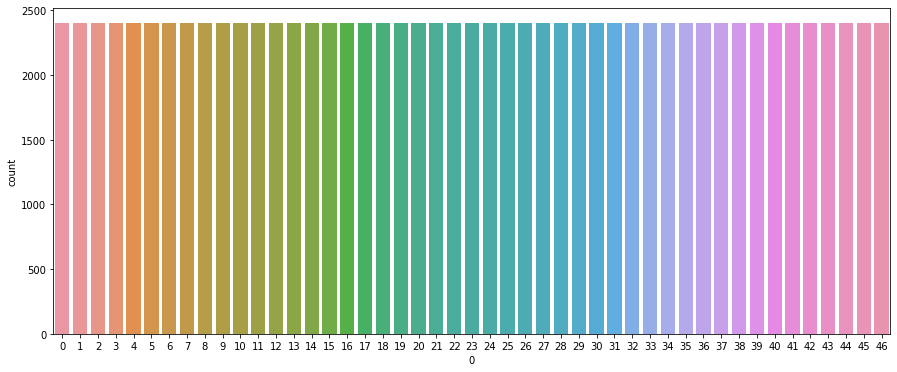

In [11]:
plt.figure(figsize=(15,6))
sns.countplot(x=0,data=trainingy)

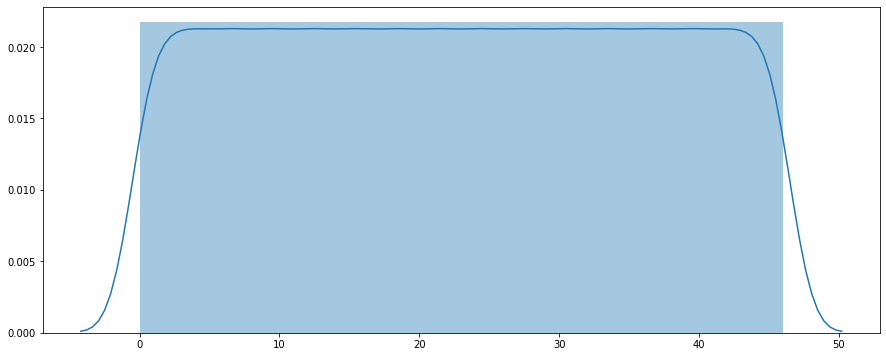

In [12]:
plt.figure(figsize=(15,6))
sns.distplot(trainingy)

In [13]:
#converting to series
trainingy=Train_data1[0]
trainingy.shape

(112800,)

In [14]:
mapping=pd.read_csv("E:\\NUST\\Semester 2\\Computer Vision\\project\\EMNIST data set\\emnist-balanced-mapping.txt", 
                        delimiter = ' ', 
                        index_col=0, 
                        header=None, 
                        squeeze=True)
mapping.head()

0
0    48
1    49
2    50
3    51
4    52
Name: 1, dtype: int64

In [15]:
mappingdict = {}
for i,L in enumerate(mapping):
    mappingdict[i] = chr(L)

mappingdict

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

In [16]:
IFP1=trainingx.loc[4]
LFP1=trainingy.loc[4]
IFP2=trainingx.loc[25]
LFP2=trainingy.loc[25]
IFP3=trainingx.loc[46]
LFP3=trainingy.loc[46]
IFP4=trainingx.loc[35]
LFP4=trainingy.loc[35]
IFP5=trainingx.loc[8]
LFP5=trainingy.loc[8]

In [17]:
IFP1.shape#means 28x28

(784,)

4


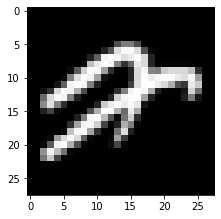

3


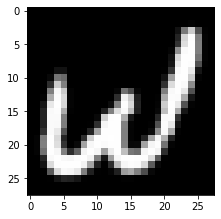

t


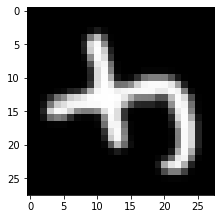

Z


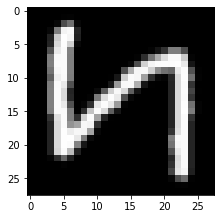

K


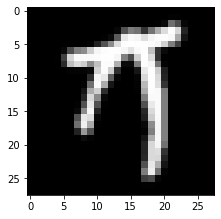

In [18]:
plt.figure(figsize=(20,20))
plt.subplot(5,1,1)
print(mappingdict[LFP1])
plt.imshow(IFP1.values.reshape(28,28),cmap='gray')
plt.show()
plt.figure(figsize=(20,20))
plt.subplot(5,1,2)
print(mappingdict[LFP2])
plt.imshow(IFP2.values.reshape(28,28),cmap='gray')
plt.show()
plt.figure(figsize=(20,20))
plt.subplot(5,1,3)
print(mappingdict[LFP3])
plt.imshow(IFP3.values.reshape(28,28),cmap='gray')
plt.show()
plt.figure(figsize=(20,20))
plt.subplot(5,1,4)
print(mappingdict[LFP4])
plt.imshow(IFP4.values.reshape(28,28),cmap='gray')
plt.show()
plt.figure(figsize=(20,20))
plt.subplot(5,1,5)
print(mappingdict[LFP5])
plt.imshow(IFP5.values.reshape(28,28),cmap='gray')
plt.show()

In [19]:
def correctingimage(imageforcorrection):
    imageforcorrection = imageforcorrection.reshape(28, 28)
    imageforcorrection = np.fliplr(imageforcorrection)
    imageforcorrection = np.rot90(imageforcorrection)
    return imageforcorrection

In [20]:
trainingx = np.apply_along_axis(correctingimage, 1, trainingx)
trainingx.shape

(112800, 28, 28)

4


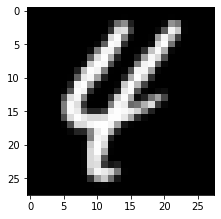

3


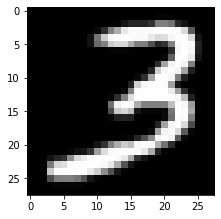

t


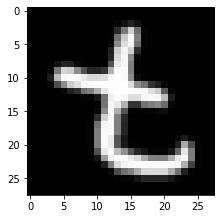

Z


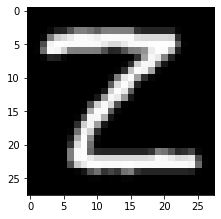

K


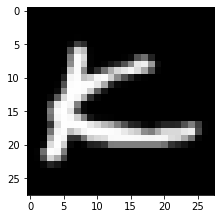

In [21]:
IFP1=trainingx[4]
LFP1=trainingy.loc[4]
IFP2=trainingx[25]
LFP2=trainingy.loc[25]
IFP3=trainingx[46]
LFP3=trainingy.loc[46]
IFP4=trainingx[35]
LFP4=trainingy.loc[35]
IFP5=trainingx[8]
LFP5=trainingy.loc[8]
plt.figure(figsize=(20,20))
plt.subplot(5,1,1)
print(mappingdict[LFP1])
plt.imshow(IFP1.reshape(28,28),cmap='gray')
plt.show()
plt.figure(figsize=(20,20))
plt.subplot(5,1,2)
print(mappingdict[LFP2])
plt.imshow(IFP2.reshape(28,28),cmap='gray')
plt.show()
plt.figure(figsize=(20,20))
plt.subplot(5,1,3)
print(mappingdict[LFP3])
plt.imshow(IFP3.reshape(28,28),cmap='gray')
plt.show()
plt.figure(figsize=(20,20))
plt.subplot(5,1,4)
print(mappingdict[LFP4])
plt.imshow(IFP4.reshape(28,28),cmap='gray')
plt.show()
plt.figure(figsize=(20,20))
plt.subplot(5,1,5)
print(mappingdict[LFP5])
plt.imshow(IFP5.reshape(28,28),cmap='gray')
plt.show()

In [22]:
#normalizing x and one hot encoding y both are not dataframes
trainingx = trainingx.astype('float32') / 255
NOL=trainingy.nunique()#numberofthelabels
trainingy = np_utils.to_categorical(trainingy, NOL)
trainingx=trainingx.reshape(-1,28,28,1)#batch size first than width than height than channels
print(trainingy.shape)
print(trainingx.shape)

(112800, 47)
(112800, 28, 28, 1)


## Training and testing

In [23]:
from sklearn.model_selection import train_test_split
XT,XV,YT,YV = train_test_split(trainingx,trainingy,test_size=0.2,random_state=44)                                                

In [24]:
ConvModel= tf.keras.models.Sequential()

# add convolutional and pooling layer
ConvModel.add(tf.keras.layers.Conv2D(filters=32, kernel_size=5, activation='relu',padding='same',input_shape=[28, 28, 1]))
ConvModel.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
ConvModel.add(tf.keras.layers.Conv2D(filters=48, kernel_size=5, activation='relu'))
ConvModel.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
ConvModel.add(tf.keras.layers.Flatten())
ConvModel.add(tf.keras.layers.Dense(256,activation='relu'))
ConvModel.add(tf.keras.layers.Dense(84,activation='relu'))
ConvModel.add(tf.keras.layers.Dense(NOL,activation='softmax'))
ConvModel.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 48)        38448     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 48)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1200)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               307456    
_________________________________________

In [ ]:
ConvModel.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
ConvModel.fit(XT,YT,epochs=3,batch_size=32)

Train on 90240 samples
Epoch 1/3


 9536/90240 [==>...........................] - ETA: 9:16 - loss: 3.8447 - acc: 0.0000e+0 - ETA: 5:59 - loss: 3.8415 - acc: 0.0156    - ETA: 3:56 - loss: 3.8474 - acc: 0.007 - ETA: 3:38 - loss: 3.8434 - acc: 0.018 - ETA: 3:27 - loss: 3.8379 - acc: 0.026 - ETA: 3:02 - loss: 3.8403 - acc: 0.027 - ETA: 2:59 - loss: 3.8480 - acc: 0.024 - ETA: 2:58 - loss: 3.8457 - acc: 0.025 - ETA: 2:54 - loss: 3.8484 - acc: 0.022 - ETA: 2:52 - loss: 3.8503 - acc: 0.023 - ETA: 2:44 - loss: 3.8429 - acc: 0.026 - ETA: 2:39 - loss: 3.8372 - acc: 0.035 - ETA: 2:39 - loss: 3.8340 - acc: 0.036 - ETA: 2:39 - loss: 3.8320 - acc: 0.034 - ETA: 2:35 - loss: 3.8211 - acc: 0.053 - ETA: 2:32 - loss: 3.8111 - acc: 0.059 - ETA: 2:32 - loss: 3.8047 - acc: 0.059 - ETA: 2:32 - loss: 3.7990 - acc: 0.063 - ETA: 2:31 - loss: 3.7908 - acc: 0.065 - ETA: 2:28 - loss: 3.7742 - acc: 0.067 - ETA: 2:26 - loss: 3.7463 - acc: 0.069 - ETA: 2:24 - loss: 3.7158 - acc: 0.080 - ETA: 2:22 - loss: 3.6973 - acc: 0.080 - ETA: 2:21 - loss: 3.6793 

28736/90240 [========>.....................] - ETA: 1:44 - loss: 1.2479 - acc: 0.637 - ETA: 1:44 - loss: 1.2457 - acc: 0.638 - ETA: 1:44 - loss: 1.2439 - acc: 0.638 - ETA: 1:44 - loss: 1.2425 - acc: 0.639 - ETA: 1:44 - loss: 1.2419 - acc: 0.639 - ETA: 1:44 - loss: 1.2409 - acc: 0.639 - ETA: 1:44 - loss: 1.2392 - acc: 0.640 - ETA: 1:43 - loss: 1.2367 - acc: 0.640 - ETA: 1:43 - loss: 1.2359 - acc: 0.640 - ETA: 1:43 - loss: 1.2352 - acc: 0.641 - ETA: 1:43 - loss: 1.2339 - acc: 0.641 - ETA: 1:43 - loss: 1.2317 - acc: 0.641 - ETA: 1:43 - loss: 1.2305 - acc: 0.642 - ETA: 1:43 - loss: 1.2295 - acc: 0.642 - ETA: 1:43 - loss: 1.2273 - acc: 0.642 - ETA: 1:43 - loss: 1.2254 - acc: 0.643 - ETA: 1:43 - loss: 1.2250 - acc: 0.643 - ETA: 1:43 - loss: 1.2233 - acc: 0.644 - ETA: 1:43 - loss: 1.2223 - acc: 0.644 - ETA: 1:43 - loss: 1.2215 - acc: 0.644 - ETA: 1:43 - loss: 1.2194 - acc: 0.645 - ETA: 1:43 - loss: 1.2189 - acc: 0.645 - ETA: 1:43 - loss: 1.2172 - acc: 0.645 - ETA: 1:42 - loss: 1.2156 - acc: 0

36768/90240 [===========>..................] - ETA: 1:30 - loss: 1.0323 - acc: 0.695 - ETA: 1:30 - loss: 1.0319 - acc: 0.695 - ETA: 1:30 - loss: 1.0307 - acc: 0.695 - ETA: 1:30 - loss: 1.0303 - acc: 0.696 - ETA: 1:30 - loss: 1.0298 - acc: 0.696 - ETA: 1:30 - loss: 1.0288 - acc: 0.696 - ETA: 1:30 - loss: 1.0285 - acc: 0.696 - ETA: 1:30 - loss: 1.0273 - acc: 0.696 - ETA: 1:30 - loss: 1.0267 - acc: 0.696 - ETA: 1:30 - loss: 1.0259 - acc: 0.697 - ETA: 1:30 - loss: 1.0255 - acc: 0.697 - ETA: 1:30 - loss: 1.0248 - acc: 0.697 - ETA: 1:30 - loss: 1.0243 - acc: 0.697 - ETA: 1:29 - loss: 1.0234 - acc: 0.697 - ETA: 1:29 - loss: 1.0229 - acc: 0.698 - ETA: 1:29 - loss: 1.0221 - acc: 0.698 - ETA: 1:29 - loss: 1.0215 - acc: 0.698 - ETA: 1:29 - loss: 1.0212 - acc: 0.698 - ETA: 1:29 - loss: 1.0198 - acc: 0.698 - ETA: 1:29 - loss: 1.0187 - acc: 0.699 - ETA: 1:29 - loss: 1.0184 - acc: 0.699 - ETA: 1:29 - loss: 1.0179 - acc: 0.699 - ETA: 1:29 - loss: 1.0174 - acc: 0.699 - ETA: 1:29 - loss: 1.0169 - acc: 0